In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import Imputer, LabelBinarizer
from sklearn.preprocessing import MinMaxScaler # can be StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

# to make this notebook's output stable across runs
np.random.seed(42)

# to plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [1]:
def load_california_housing():
    ''' Loads the California housing dataset from the "housing.csv" CSV file
    
    Returns
    -----------
    dataset : Pandas dataframe, shape = [20640, 10]

    '''
    dataset =  pd.read_csv("housing.csv")
    return dataset


def housing_histograms(housing):
    ''' Plots histograms of all atributes of a dataset
    
    Parameters
    -----------
    housing: Pandas dataframe, shape = [20640, 10]
        Dataset whose attributes' histograms will be plotted.
    
    '''
    housing.hist(bins=50, figsize=(20,15))
    plt.gcf().canvas.set_window_title("Attribute Histograms")
    plt.show()


def housing_prices_scatterplot(housing):
    '''Shows a scatterplot for median house values of blocks in the
    California housing dataset (point size shows block's population)
    
    Parameters
    -----------
    housing: Pandas dataframe, shape = [20640, 10]
        California housing dataset with block median house values to plot.
    
    '''
    california_img = mpimg.imread("california.png")
    ax = housing.plot(kind="scatter", x="longitude", y="latitude",
                      figsize=(10,7), s=housing['population']/100,
                      label="Population", c="median_house_value",
                      cmap=plt.get_cmap("jet"), colorbar=False, alpha=0.4)
    plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05],
               alpha=0.5, cmap=plt.get_cmap("jet"))
    plt.ylabel("Latitude", fontsize=14)
    plt.xlabel("Longitude", fontsize=14)

    prices = housing["median_house_value"]
    tick_values = np.linspace(prices.min(), prices.max(), 11)
    cbar = plt.colorbar()
    cbar.ax.set_yticklabels(["$%dk" % (round(v / 1000)) for v in tick_values],
                            fontsize=14)
    cbar.set_label('Median House Value', fontsize=16)

    plt.legend(fontsize=16)
    plt.gcf().canvas.set_window_title("Housing Prices Scatterplot")
    plt.show()


def housing_prices_correlations(housing):
    '''Analyses correlation between median_house_value and the other attributes 
    of the California housing dataset by numerical calculation and a matrix of
    scatterplots.
    
    Parameters
    -----------
    housing: Pandas dataframe, shape = [20640, 10]
        California housing dataset.
 
    '''
    corr_matrix = housing.corr()
    corr_values = corr_matrix["median_house_value"].sort_values(ascending=False)
    print(corr_values)
    
    from pandas.plotting import scatter_matrix

    attributes = ["median_house_value", "median_income", "total_rooms",
                  "housing_median_age"]
    scatter_matrix(housing[attributes], figsize=(12, 8))
    plt.gcf().canvas.set_window_title("Correlation Matrix Scatterplots")
    plt.show()
    
    housing.plot(kind="scatter", x="median_income", y="median_house_value",
                 alpha=0.1)
    plt.axis([0, 16, 0, 550000])
    plt.gcf().canvas.set_window_title("median_income vs. median_house_value")
    plt.show()


def housing_imputing(housing):
    '''Fills out missing values in 'total_bedrooms' attribute
    
    Parameters
    -----------
    housing: Pandas dataframe, shape = [20640, 10]
        California housing dataset.

    Returns
    -----------
    housing_cat : Pandas dataframe, shape = [20640, 9]
        California housing dataset with no values missing ('ocean_proximity'
        column is dropped because the imputer transformer doesn't work with
        categorical values)
    imputer : Imputer instance
        Keeps information about the applied imputing strategy

    '''
    imputer = Imputer(strategy="median")

    # Remove the text attribute because median works only on numbers
    # (housing.drop makes a copy of the dataframe)
    housing_num = housing.drop('ocean_proximity', axis=1)

    print(imputer.fit(housing_num))
    print("\nCalculated Medians (imputer):")
    print(imputer.statistics_)

    print("\nCalculated Medians (Pandas function):")
    print(housing_num.median().values)

    # Apply the imputer to all the numerical attributes, just in case
    # new data have missing values in other attributes
    X = imputer.transform(housing_num)

    # X is a numpy ndarray, to put it back in a Pandas dataframe:
    housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                              index = list(housing.index.values))

    return (housing_tr, imputer)


def housing_categorical_preprocessing(housing_cat):
    '''Transforms a categorical column into One-Hot Encoding (OHE)
    
    Parameters
    -----------
    housing_cat: array, shape = (-1, 1)
        Categorical column to encode.

    Returns
    -----------
    housing_cat_ohe : array, shape = (-1, 1)
        One-hot encoded categorical olumn

    '''
    encoder = LabelBinarizer()
    housing_cat_ohe = encoder.fit_transform(housing_cat)

    ohes = encoder.transform(encoder.classes_.reshape(-1, 1))
    for category, ohe in zip(encoder.classes_, ohes):
        print("{:>10} -> {}".format(category, ohe))

    ###########################################################################
    # For Scikit-Learn > 0.19.2:
    #     Class "OneHotEncoder" is preferred over "LabelBinarizer", and the
    #     attribute to use is "categories_" not "classes_"
    ###########################################################################

    return housing_cat_ohe

In [5]:
if __name__ == '__main__':
    housing = load_california_housing()
    print("\n+++ First data rows +++\n")
    print(housing.head())


+++ First data rows +++

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [6]:
    print("\n+++ Dataframe info +++\n")
    housing.info()


+++ Dataframe info +++

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
    print("\n+++ Dataframe description +++\n")
    print(housing.describe())


+++ Dataframe description +++

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       

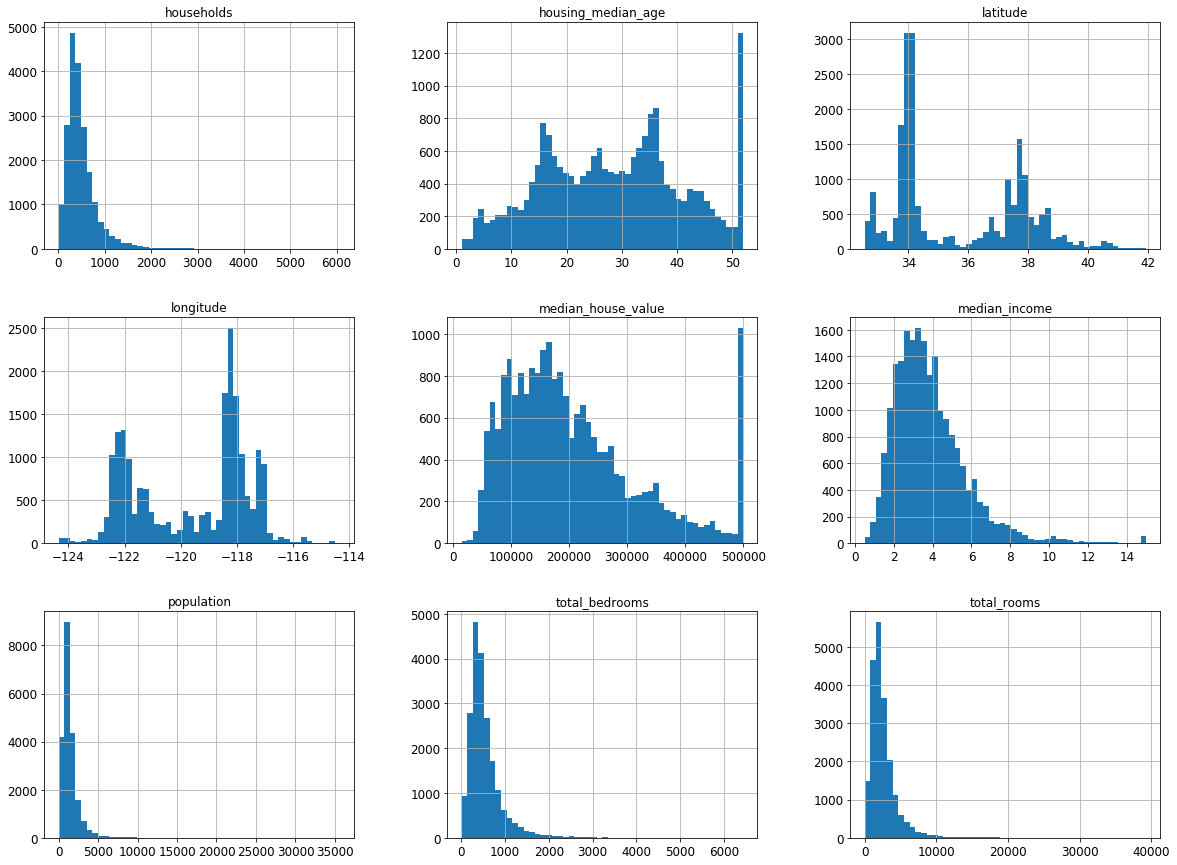

In [8]:
    # Plot histograms for every attribute to gain "insights"
    housing_histograms(housing)

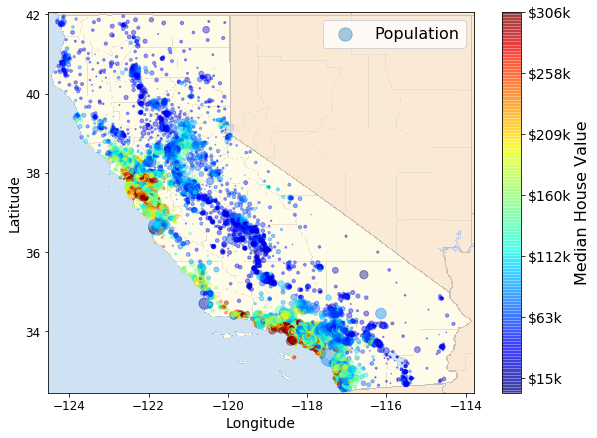

In [9]:
    # Plot housing prices on the California map
    housing_prices_scatterplot(housing)


+++ Correlation analysis between attributes +++

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


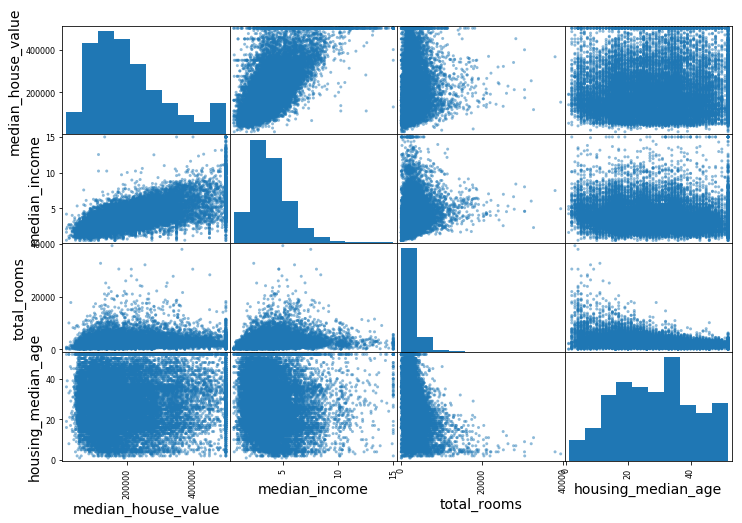

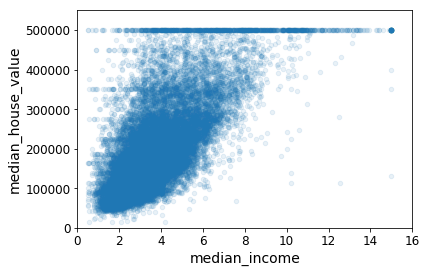

In [10]:
    print("\n+++ Correlation analysis between attributes +++\n")
    housing_prices_correlations(housing)

In [12]:
    print("\n+++ Missing values +++\n")
    sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
    print(sample_incomplete_rows)
    print("\n... or showing column directly:")
    print(sample_incomplete_rows["total_bedrooms"].head())


+++ Missing values +++

     longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290    -122.16     37.77                47.0       1256.0             NaN   
341    -122.17     37.75                38.0        992.0             NaN   
538    -122.28     37.78                29.0       5154.0             NaN   
563    -122.24     37.75                45.0        891.0             NaN   
696    -122.10     37.69                41.0        746.0             NaN   

     population  households  median_income  median_house_value ocean_proximity  
290       570.0       218.0         4.3750            161900.0        NEAR BAY  
341       732.0       259.0         1.6196             85100.0        NEAR BAY  
538      3741.0      1273.0         2.5762            173400.0        NEAR BAY  
563       384.0       146.0         4.9489            247100.0        NEAR BAY  
696       387.0       161.0         3.9063            178400.0        NEAR BAY  

... or showing column dir

In [13]:
    print("\n+++ Imputing missing values +++\n")
    (housing_complete, imputer) = housing_imputing(housing)


+++ Imputing missing values +++

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

Calculated Medians (imputer):
[-1.1849e+02  3.4260e+01  2.9000e+01  2.1270e+03  4.3500e+02  1.1660e+03
  4.0900e+02  3.5348e+00  1.7970e+05]

Calculated Medians (Pandas function):
[-1.1849e+02  3.4260e+01  2.9000e+01  2.1270e+03  4.3500e+02  1.1660e+03
  4.0900e+02  3.5348e+00  1.7970e+05]


/home/ktsb3/ml/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
    print("\n+++ Filled values +++\n")
    print(housing_complete.loc[sample_incomplete_rows.index.values])
    print("\n... or showing column directly:")
    filled = housing_complete.loc[sample_incomplete_rows.index.values]
    print(filled["total_bedrooms"].head())


+++ Filled values +++

     longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290    -122.16     37.77                47.0       1256.0           435.0   
341    -122.17     37.75                38.0        992.0           435.0   
538    -122.28     37.78                29.0       5154.0           435.0   
563    -122.24     37.75                45.0        891.0           435.0   
696    -122.10     37.69                41.0        746.0           435.0   

     population  households  median_income  median_house_value  
290       570.0       218.0         4.3750            161900.0  
341       732.0       259.0         1.6196             85100.0  
538      3741.0      1273.0         2.5762            173400.0  
563       384.0       146.0         4.9489            247100.0  
696       387.0       161.0         3.9063            178400.0  

... or showing column directly:
290    435.0
341    435.0
538    435.0
563    435.0
696    435.0
Name: total_bedrooms, dty

In [15]:
    print("\n+++ Categorical data counts +++\n")
    print(housing["ocean_proximity"].value_counts())


+++ Categorical data counts +++

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [16]:
    print("\n+++ One-hot encoded categories +++\n")
    housing_cat = housing['ocean_proximity']
    housing_cat_ohe = housing_categorical_preprocessing(housing_cat)


+++ One-hot encoded categories +++

 <1H OCEAN -> [1 0 0 0 0]
    INLAND -> [0 1 0 0 0]
    ISLAND -> [0 0 1 0 0]
  NEAR BAY -> [0 0 0 1 0]
NEAR OCEAN -> [0 0 0 0 1]


In [17]:
    cols = housing_cat_ohe.shape[1]
    for i in range(cols):
        housing_complete["ocean_proximity_" + str(i)] = housing_cat_ohe[:, i]

    print("\n+++ First (preprocessed) data rows +++\n")
    print(housing_complete.head())

    print("\n+++ Columnas:", housing_complete.columns)


+++ First (preprocessed) data rows +++

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_0  ocean_proximity_1  ocean_proximity_2  ocean_proximity_3  \
0                  0                  0   

In [18]:
    # Divide dataset into data and labels for machine learning algorithms
    y = housing_complete["median_house_value"].values
    y = y.reshape(-1, 1) # 1d COLUMN vector
    
    housing_complete.drop('median_house_value', axis=1, inplace=True)
    X = housing_complete.values
    
    ##############################
    ### MACHINE LEARNING STAGE ###
    ##############################
    print("\n+++ Shape of data and labels +++")
    print("Data shape:", X.shape)
    print("Labels shape:", y.shape)


+++ Shape of data and labels +++
Data shape: (20640, 13)
Labels shape: (20640, 1)


In [19]:
    sc_x = MinMaxScaler()
    sc_y = MinMaxScaler()
    
    X_std = sc_x.fit_transform(X)
    y_std = sc_y.fit_transform(y)

In [20]:
    print("\n+++ Linear Regression Model +++\n")

    # Fitting
    lin_reg = LinearRegression()
    lin_reg.fit(X_std, y_std)
    
    # Prediction
    y_hat = lin_reg.predict(X_std)
    
    # Root Mean Square Error (RMSE) calculation
    lin_mse_std = mean_squared_error(y_std, y_hat)
    lin_rmse_std = np.sqrt(lin_mse_std)
    
    # Denormalization
    print("RMSE: ", sc_y.inverse_transform(lin_rmse_std.reshape((-1, 1))))

    # Mean Absolute Error (MAE) calculation
    lin_mae_std = mean_absolute_error(y_std, y_hat)
    
    # Denormalization
    print("MAE: ", sc_y.inverse_transform(lin_mae_std.reshape((-1,1))))


+++ Linear Regression Model +++

RMSE:  [[83708.32557762]]
MAE:  [[64827.73915372]]


In [21]:
    print("\n+++ Decision Tree Regression Model +++\n")

    # Fitting
    tree_reg = DecisionTreeRegressor(random_state=42)
    tree_reg.fit(X_std, y_std)

    # Prediction
    y_hat = tree_reg.predict(X_std)
    
    # Root Mean Square Error (RMSE) calculation
    tree_mse_std = mean_squared_error(y_std, y_hat)
    tree_rmse_std = np.sqrt(tree_mse_std)
    
    # Denormalization
    print("RMSE: ", sc_y.inverse_transform(tree_rmse_std.reshape((-1, 1))))

    # Mean Absolute Error (MAE) calculation
    tree_mae_std = mean_absolute_error(y_std, y_hat)
    
    # Denormalization
    print("MAE: ", sc_y.inverse_transform(tree_mae_std.reshape((-1, 1))))


+++ Decision Tree Regression Model +++

RMSE:  [[15024.23869573]]
MAE:  [[15003.68052881]]
